# Group Contributions Statement

Clara imported the data and Jinyoung cleaned it and prepped it for exploratory analysis. Jinyoung and Allen created the display tables in the exploratory analysis. In the exploratory analysis, Allen created the scatter plots, Jinyoung created the boxplot and the barplot. Jinyoung is in charge of the feature selection and Allen edited the code. Jinyoung and Allen wrote the function for plotting decision regions and debugged it.  For the machine learning models, Allen did the Support Vector Machine model, Jinyoung did the random forest and logistic regression model. They then trained the model by selecting best parameters and plotting decision regions. Allen wrote the majority of the comments throughout the project with the review from Jinyoung and Clara. Clara made sure we have met each component in the description.

# Data Importing and Cleaning

In [1]:
# standard imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# load the data 
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"

# read in the data
penguins = pd.read_csv(url)

In [2]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


We first examine the data imported. We see there are many columns that record the attributes of each penguin observed, including Species, Island, Sex, etc. Some data were recorded by researchers for recordkeeping but may not be related to our prediction. There are also NaN values, which means we will need to remove them later. 

We will shorten the species names for simplicity.

In [3]:
# we look at the original species names for reference before shortening
penguins["Species"].head() 

0    Adelie Penguin (Pygoscelis adeliae)
1    Adelie Penguin (Pygoscelis adeliae)
2    Adelie Penguin (Pygoscelis adeliae)
3    Adelie Penguin (Pygoscelis adeliae)
4    Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

In [4]:
penguins['Species'] = penguins['Species'].str.split().str.get(0) # shortens species names to first word
penguins["Species"].head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: Species, dtype: object

## Data Prep for Exploratory Analysis

Intuitively, we think a species can be determined by the penguin's culmen length and depth, as well as its body mass. Although there may be some variations among individual penguins, these values should be reasonably close for penguins in the same species.  

We are also wondering if there's a gender-based or island-based differences in the body mass and culmen length and depth. Since all penguins are observed in the Anvers region, we won't use region as a predictor.

We create 2 subsets of data, one WITH Island included (subset 1), and one WITHOUT Island included (subset 2).

In [5]:
# We select these columns as our first subset to examine if these variables are good predictors
# Island is included
test = ["Species","Sex","Island","Culmen Length (mm)","Culmen Depth (mm)", "Body Mass (g)"]
subset1 = penguins[test]
subset1 = subset1.dropna() # remove NAs
subset1 = subset1[subset1['Sex']!='.'] # remove incorrectly recorded data
subset1

,Species,Sex,Island,Culmen Length (mm),Culmen Depth (mm),Body Mass (g)
0,Adelie,MALE,Torgersen,39.1,18.7,3750.0
1,Adelie,FEMALE,Torgersen,39.5,17.4,3800.0
2,Adelie,FEMALE,Torgersen,40.3,18.0,3250.0
4,Adelie,FEMALE,Torgersen,36.7,19.3,3450.0
5,Adelie,MALE,Torgersen,39.3,20.6,3650.0
...,...,...,...,...,...,...
338,Gentoo,FEMALE,Biscoe,47.2,13.7,4925.0
340,Gentoo,FEMALE,Biscoe,46.8,14.3,4850.0
341,Gentoo,MALE,Biscoe,50.4,15.7,5750.0
342,Gentoo,FEMALE,Biscoe,45.2,14.8,5200.0


In [6]:
# We select these columns as our second subset to examine if these variables are good predictors
# Island is NOT included
cols = ["Species","Sex","Culmen Length (mm)","Culmen Depth (mm)", "Body Mass (g)"]
subset2 = penguins[cols]
subset2 = subset2.dropna() # remove Nas
subset2 = subset2[subset2['Sex']!='.'] # remove incorrectly recorded data
subset2

,Species,Sex,Culmen Length (mm),Culmen Depth (mm),Body Mass (g)
0,Adelie,MALE,39.1,18.7,3750.0
1,Adelie,FEMALE,39.5,17.4,3800.0
2,Adelie,FEMALE,40.3,18.0,3250.0
4,Adelie,FEMALE,36.7,19.3,3450.0
5,Adelie,MALE,39.3,20.6,3650.0
...,...,...,...,...,...
338,Gentoo,FEMALE,47.2,13.7,4925.0
340,Gentoo,FEMALE,46.8,14.3,4850.0
341,Gentoo,MALE,50.4,15.7,5750.0
342,Gentoo,FEMALE,45.2,14.8,5200.0


# Exploratory Analysis

## Summary Statistics and Displayed Tables

In [7]:
# Visualize subset 1
subset1.groupby(["Species","Sex","Island"])[["Culmen Length (mm)",
                                             "Culmen Depth (mm)", 
                                            "Body Mass (g)"]].aggregate([np.mean,np.std])

Culmen Length (mm)           Culmen Depth (mm)  \
                                         mean       std              mean   
Species   Sex    Island                                                     
Adelie    FEMALE Biscoe             37.359091  1.762212         17.704545   
                 Dream              36.911111  2.089043         17.618519   
                 Torgersen          37.554167  2.207887         17.550000   
          MALE   Biscoe             40.590909  2.006634         19.036364   
                 Dream              40.071429  1.748196         18.839286   
                 Torgersen          40.586957  3.027496         19.391304   
Chinstrap FEMALE Dream              46.573529  3.108669         17.588235   
          MALE   Dream              51.094118  1.564558         19.252941   
Gentoo    FEMALE Biscoe             45.563793  2.051247         14.237931   
          MALE   Biscoe             49.473770  2.720594         15.718033   

                                     Body Mass (g)              
                                 std          mean         std  
Species   Sex    Island                                         
Adelie    FEMALE Biscoe     1.091298   3369.318182  343.470715  
                 Dream      0.897448   3344.444444  212.056475  
                 Torgersen  0.879723   3395.833333  259.144356  
          MALE   Biscoe     0.879689   4050.000000  355.567956  
                 Dream      1.033276   4045.535714  330.547636  
                 Torgersen  1.082469   4034.782609  372.471714  
Chinstrap FEMALE Dream      0.781128   3527.205882  285.333912  
          MALE   Dream      0.761273   3938.970588  362.137550  
Gentoo    FEMALE Biscoe     0.540249   4679.741379  281.578294  
          MALE   Biscoe     0.741060   5484.836066  313.158596

We will not use island as a predictor in our modeling since not all species appear on all islands. For instance, the Adelie species is found on three islands. However, Dream Island only has Chinstrap, and Biscoe only has Gentoo.

In [8]:
# Visualize subset 2 
subset2.groupby(["Species","Sex"])[["Culmen Length (mm)",
                                    "Culmen Depth (mm)", 
                                    "Body Mass (g)"]].aggregate([np.mean,np.std])

Culmen Length (mm)           Culmen Depth (mm)            \
                               mean       std              mean       std   
Species   Sex                                                               
Adelie    FEMALE          37.257534  2.028883         17.621918  0.942993   
          MALE            40.390411  2.277131         19.072603  1.018886   
Chinstrap FEMALE          46.573529  3.108669         17.588235  0.781128   
          MALE            51.094118  1.564558         19.252941  0.761273   
Gentoo    FEMALE          45.563793  2.051247         14.237931  0.540249   
          MALE            49.473770  2.720594         15.718033  0.741060   

                 Body Mass (g)              
                          mean         std  
Species   Sex                               
Adelie    FEMALE   3368.835616  269.380102  
          MALE     4043.493151  346.811553  
Chinstrap FEMALE   3527.205882  285.333912  
          MALE     3938.970588  362.137550  
Gentoo    FEMALE   4679.741379  281.578294  
          MALE     5484.836066  313.158596

We see that across the three species, the mean Culmen Length & Depth (in mm), and Body Mass (in g) are higher in Male than Female.  The standard deviation in these attributes are also overall higher in Male, but there are some exceptions in the Chinstrap species. 

We can further observe that the means of these attributes take on different range of values after factoring in standard deviation. There is thus evidence that Culmen Length and Depth and Sex may be good predictors for the penguin species. There are exceptions, as we can see the mean Culmen Length is simiar for Gentoo and Chinstrap, and mean Culmen Depth is similar for Adelie and Chinstrap. However, at least one other species still has a different value, and other attributes (especially body mass) are still very different, so we can expect good results using these predictors.

## Figures

Using figures, we observe if there are any correlations between the variables.

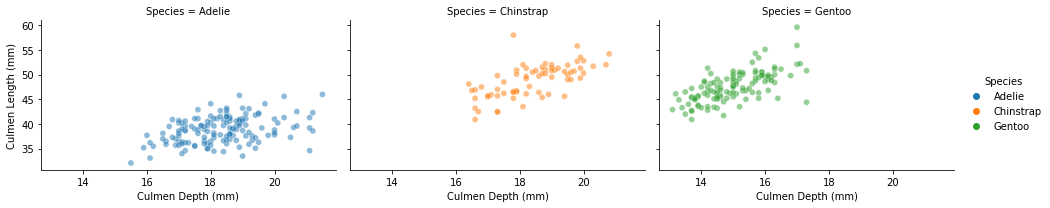

In [9]:
import seaborn as sns

# Scatterplots of Culmen Depth vs Culmen Length, one for each species
fgrid=sns.relplot(data=subset2,
                  x="Culmen Depth (mm)",
                  y="Culmen Length (mm)",
                  hue="Species",
                  alpha=.5,
                  col="Species",
                  col_wrap=3,
                  height=3, 
                  aspect=1.5)

We see that there's a positive, roughly linear relationship between Culmen Length and Culmen Depth across the three species. To determine if they form clusters of penguins, we plot them on the same plot. 

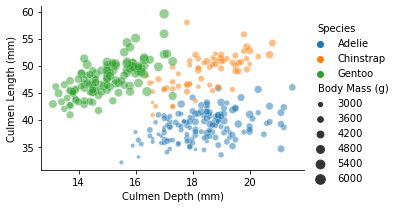

In [10]:
# Scatterplot of Culmen Depth vs Culmen Lenth for all 3 species, on same plot
fgrid = sns.relplot(data=subset2,
                  x="Culmen Depth (mm)",
                  y="Culmen Length (mm)",
                  hue="Species",
                  size = "Body Mass (g)",
                  sizes = (10,100), # to accommodate all sizes
                  alpha = .5,
                  height = 3, 
                  aspect = 1.5)
fgrid

We see three clusters of Culmen Depth vs Culmen Length formed based on the species of the penguins. In addition, we see that Gentoo penguins have greater body mass than the other two species. These observations suggest that Culmen Length and Depth are likely strong predictors of species and should be used in our modeling. Body mass may also be a good indicator, however it does not distinguish Chinstrap and Adelie in some cases. We need to use systematic feature selection to discover this.

<AxesSubplot:xlabel='Species', ylabel='Culmen Depth (mm)'>

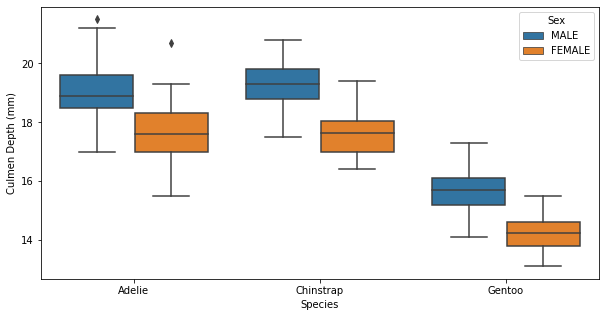

In [11]:
# Box plot to compare Culmen Depth by species
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="Species",y="Culmen Depth (mm)",hue="Sex", data=subset2)

As before, we see that Adelie and Chinstrap have similar Culmen Depths, which is greater than the Culmen depth of the Gentoo species. This indicates that Culmen Depth is a good predictor of species, so we will consider using it in our modeling. In addition, male penguins generally have a higher culmen depth, so sex can be a good predictor if paired with culmen depth.

<AxesSubplot:xlabel='Species', ylabel='Culmen Length (mm)'>

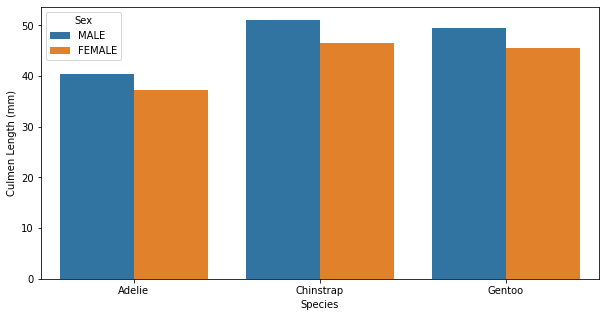

In [12]:
# Bar plot to compare Culmen Length by species 
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=subset2, x="Species",y="Culmen Length (mm)",hue="Sex",ci = None)
# ci = None to get rid of error bar

We see that across all three species, males have greater Culmen Lengths than females. This suggests that sex is a strong predictor of species and should thus be considered in modeling. Each species also has different culmen length. Therefore, we can see there's a gender-based gap in both culmen length and culmen depth of the penguins. So we can use culmen length, culmen depth, and sex in our models. To validate this, we proceed to feature selection.

# Feature Selection

## Data Prep for Modeling

In [13]:
# Split data into training and test
from sklearn.model_selection import train_test_split
np.random.seed(1111) # set a seed for consistency
train,test=train_test_split(penguins,test_size=.2) # 80-20 split

In [14]:
# Data cleaning and spliting into X and y

from sklearn import preprocessing

def prep_penguins_data(data):
    """
    Purpose: Cleans data to remove incorrect or NA entries
    and label qualitative features
    
    Inputs: 
    ---------
    data: input dataframe
    
    Output:
    ---------
    Cleaned version of input data, split into training and test data
    """
    # modify a copy of the data to prevent pollution
    df=data.copy()
    
    # Shorten the species name to first word
    df['Species'] = df['Species'].str.split().str.get(0) 

    # Drop the columns we don't need 
    df=df.drop(['studyName','Sample Number','Region','Stage','Individual ID','Clutch Completion',
               'Date Egg','Comments'],axis=1)
    
    # Remove NaN values
    df=df.dropna()
    
    # Remove the rows that were not recorded in Sex column
    df= df[df['Sex']!='.']

    # Turn text values into integer labels
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Island'] = le.fit_transform(df['Island'])
    df['Species'] = le.fit_transform(df['Species'])
    
    # Split into X and y
    X=df.drop(['Species'],axis=1) # training data
    y=df['Species'] # test data
    
    return(X,y)

In [15]:
# Clean and split training data
X_train, y_train = prep_penguins_data(train)

# Clean and split test data
X_test,  y_test  = prep_penguins_data(test)

## Systematic Feature Selection

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

LR=LogisticRegression(solver='lbfgs', max_iter=1000)

def check_column_score(cols):
    """
    Purpose: Trains and evaluates a model via cross validation 
    on the columns of data selected
    
    Inputs: 
    ---------
    cols: selected columns in data frame 
    
    Output:
    ---------
    Cross validation score for the selected columns
    The higher the score, the better the result

    """
    print("Training with columns" + str(cols)) # features used in the current iteration
    return cross_val_score(LR,X_train[cols],y_train,cv=10).mean() 
    # we use performance on logistic regression model to select the features that yield the highest
    # score, and we use 10-fold cross validation. This function can print score
    # of each combination of columns

In [17]:
# Enumerate all possible combos consisting of 1 qualitative feature and 2 quantitative features
combos = [['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Length (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
          ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Culmen Depth (mm)','Delta 13 C (o/oo)'],
          ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
          ['Island', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
          ['Island', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
          ['Island', 'Body Mass (g)', 'Delta 13 C (o/oo)'],
          ['Island', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Culmen Length (mm)', 'Body Mass (g)'],
          ['Sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Culmen Depth (mm)','Delta 13 C (o/oo)'],
          ['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
          ['Sex', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'] ,
          ['Sex', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
          ['Sex','Body Mass (g)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

# Find 3 best features
best_score = 0 # initialize score for update
best_combo = []
for combo in combos: # iterate through combos and print CV scores 
    x=check_column_score(combo)
    if x > best_score: # update best score if the current combo yields a better score
        best_score = x
        best_combo = combo # update parameter
    print("CV score is "+ str(np.round(x,3))) # print score for clarity

Training with columns['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.973
Training with columns['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.961
Training with columns['Island', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.973
Training with columns['Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)']
CV score is 0.957
Training with columns['Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
CV score is 0.965
Training with columns['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.806
Training with columns['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is 0.775
Training with columns['Island', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']
CV score is 0.798
Training with columns['Island', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']
CV score is 0.911
Training with columns['Island', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.71
Training with columns['Island', 'Flipper Length (mm)', 'Delta 15 N (o/oo)']
CV sco

In [18]:
# Print the best combo and its score  
print(best_combo, best_score)

['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 0.9883076923076924


To see which combination of features is optimal for our models, we checked cross-validation scores for all  column combinations consisting of 1 qualitative feature and 2 quantitative features. This is a systematic way to check how good the prediciton is in case of random noises. Cross-validation scores  help eliminate bias and overfitting.

We notice that Body Mass seems to be a confounding variable. Each time body mass is included in the combination of features, the accuracy is generally lower. So we won't use it.

After this systematic algorithm for feature selection, we see the optimal combination was Sex, Culmen Length (mm), and Culmen Depth (mm) because it gave us the highest accuracy. This matches what we found in Exploratory Data Analysis.

Cross validation is used to select the parameters that yield the highest cross valdiation score, indicating they will be good predicors. They are then used to shorten the training data, fit the model, and compute model accuracy score.

# Modeling

In [19]:
# Using the three features that yield the highest accuracy, we examine the training and testing predictor data
# we shorten the training and testing data for efficiency
X_train=X_train[['Sex','Culmen Length (mm)','Culmen Depth (mm)']]
X_test=X_test[['Sex','Culmen Length (mm)','Culmen Depth (mm)']]

X_train.head()

,Sex,Culmen Length (mm),Culmen Depth (mm)
193,0,46.2,17.5
66,0,35.5,16.2
188,0,47.6,18.3
138,0,37.0,16.5
249,1,50.0,15.3


In [20]:
X_test.head()

,Sex,Culmen Length (mm),Culmen Depth (mm)
115,1,42.7,18.3
27,0,40.5,17.9
310,0,47.5,15.0
284,0,45.8,14.2
209,1,49.3,19.9


In [21]:
y_train # label of penguin species

193    1
66     0
188    1
138    0
249    2
      ..
180    1
162    1
337    2
229    2
311    2
Name: Species, Length: 258, dtype: int64

# First Model: Logistic Regression

## Cross-Validation

In [22]:
score = np.zeros(10)
bestS = 0
bestD = 0
for i in range(1,11):
    LR=LogisticRegression(C=i, solver='lbfgs', max_iter=1000) 
    # C is regularization strength, the complexity parameter
    
    # adjust for index since we start i with 1
    score[i-1] = cross_val_score(LR,X_train,y_train).mean()
    if score[i-1]>bestS: # update score and parameter if better
        bestD = i
        bestS = score[i-1]
        
print(bestD) # best complexity parameter
print(bestS) # best score with training data

2
0.9844645550527904


After some experimentations (running the cross-validation for 20-100 iterations), we found that the best complexity parameter is 2 and the best score is 0.984 on the training data. Therefore, we can simply run the cross-validation for 10 iterations and still get the same result. This is how we chose to iterate through range(1,11) to shorten runtime. 

## Evaluation on Unseen Data

* Logistic Regression Score

In [23]:
# Fit the best parameter (2) on the training data and score it on the testing data.
LR=LogisticRegression(C=2, solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
LR.score(X_test,y_test)

1.0

We see that the model performs well on the testing data, and there's no significant overfitting. The perfect 1.0 score shouldn't be too surprising, because the model can already achieve 0.984 on the training data.

* Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix 

# Create confusion matrix to see where errors were made in model 
LR.fit(X_train,y_train)
y_test_pred=LR.predict(X_test)
LRc=confusion_matrix(y_test,y_test_pred) # evaluate confusion matrix on the test set
LRc

array([[32,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 24]])

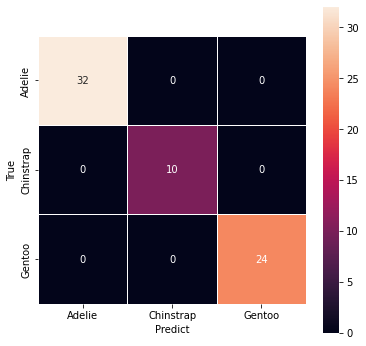

In [25]:
x_axis_labels = ['Adelie', 'Chinstrap', 'Gentoo'] # labels for x-axis
y_axis_labels = ['Adelie', 'Chinstrap', 'Gentoo'] # labels for y-axis

# make a heat map for confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(LRc, annot = True, fmt='d', linewidths=.5,square=True, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.ylabel("True")
plt.xlabel("Predict")
plt.show()

We observe from the diagonal of matrix that the model is perfectly right. The off diagonals are all 0s and the main diagonal are all positive entries. Our predictions match all the actual penguin species. 

This makes sense, because as covered in class, logistic regression is good at classification tasks like spam and non-spam emails based on the keywords a email contains. As visualized in data exploration, there are clear clusters of penguin species based on their culmen length, depth, and sex. Therefore, it makes sense that logistic regression succeeds in classifying penguin species.

## Decision Regions 

In [28]:
import matplotlib.patches as mpatches  #can use mpatches.Patch function for legend
from matplotlib.legend_handler import HandlerPatch
def plot_regions(c, X, y):
    """
    Purpose: Plots deciiosn region based on model, predictor data and target data 
    
    Inputs: 
    ---------
    c: model we are evaluating (logistic regression, random forest, etc)
    X: is the predictor data as an array
    y: is the target data as an array 
    
    Output:
    ---------
    Decision region plot 
    """
    
    Female = (X['Sex']==0) # we get a true false array of whether "Sex" in the training data is female or not
    F=X[Female] # we store the female predictor data in F
    F=F.drop(['Sex'],axis=1) # we do a scatterplot of depth vs length for each sex, so we don't need the sex column
    y0=y[Female] # extract female target data
    F0 = F['Culmen Length (mm)'] # we plot culmen depth vs. culmen length
    F1 = F['Culmen Depth (mm)']
    
    # Similar procedure for Male data
    Male = (X['Sex']==1)
    M=X[Male]
    M=M.drop(['Sex'],axis=1)
    y1=y[Male]
    M0 = M['Culmen Length (mm)']
    M1 = M['Culmen Depth (mm)']
    c.fit(X,y) # fit the model on all data
    X0 = X["Culmen Length (mm)"] # all data of Culmen Length
    X1 = X["Culmen Depth (mm)"] # all data of Culmen Depth

    # create a grid
    # axis includes all values from minimum to maximum of culmen length and depth to line up the
    # axis for both gender
    grid_x = np.linspace(X0.min(),X0.max(),258) # make a lot of points for a smooth plot
    grid_y = np.linspace(X1.min(),X1.max(),258) 
   
    xx, yy = np.meshgrid(grid_x, grid_y) # generate two dimension grids to plot for female
    
    # repeat above steps for males 
    grid_a = np.linspace(X0.min(),X0.max(),258)
    grid_b = np.linspace(X1.min(),X1.max(),258)
    
    aa, bb = np.meshgrid(grid_a, grid_b)
    
    # transform to 1D to apply model for female
    XX = xx.ravel() 
    YY = yy.ravel()

    ZZ = np.zeros(XX.shape) # match female data to the right dimension to predict on all three features
    # ZZ encodes the gender information, which is 0 for female
    
    # transform to 1D to apply model for male
    AA = aa.ravel()
    BB = bb.ravel()
    CC = np.ones(AA.shape) # CC encodes the gender information, 1 for male
   

    

    p = c.predict(np.c_[ZZ,XX,YY]) # use the fitted model to predict using the female data

    p = p.reshape(xx.shape) # shape back
    
    # similarly for male data


    r = c.predict(np.c_[CC,AA,BB])

    r = r.reshape(aa.shape)
    
    # create the plot
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    
    # plot female data and add labels
    ax[0].scatter(F0, F1, c = y0, cmap = "jet") # scatter plot of culmen depth vs length, color code by species
    ax[0].set(xlabel = "Culmen Length (mm)", 
            ylabel = "Culmen Depth (mm)",
             title= "Female")
    # plot male data
    ax[1].scatter(M0, M1, c = y1, cmap = "jet")
    ax[1].set(xlabel = "Culmen Length (mm)", 
          ylabel = "Culmen Depth (mm)",
             title = "Male")
    # use contour plot to visualize the decision regions
    ax[0].contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
    ax[1].contourf(aa, bb, r, cmap = "jet", alpha = 0.2)
    # add legend
    red_patch = mpatches.Patch(color='red', label='Gentoo')
    blue_patch = mpatches.Patch(color='blue', label='Adelie')
    green_patch = mpatches.Patch(color='green', label='Chinstrap')
    plt.legend(handles=[red_patch,blue_patch,green_patch])
   

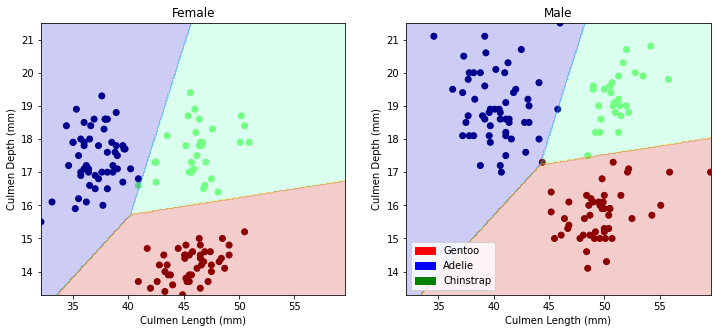

In [29]:
plot_regions(LR, X_train, y_train) 

Mistakes Made By Model:  The model is perfectly correct on the testing data, which is shown by the confusion matrix having diagonal non-zero values, and all other values being 0. We will then talk about weaknesses. From the decision region, we can see there are data points that lie on the border of the species. A male chinstrap penguin almost falls in the region of Gentoo, and another is on the crossing of the three border lines. A female Chinstrap also nearly falls into Adeleie. This shows that the model may struggle when classifying some of the penguins from two species but have similar culmen length and depth.

# Second Model: Random Forest Classifier

## Cross-validation

In [30]:
from sklearn.ensemble import RandomForestClassifier
score = np.zeros(50) # do 50 iterations to find the best number of decision trees for random forest
bestS = 0
bestD = 0
# iteratively update to find the best score and parameter
for i in range(1,51):
    # the complexity parameter is n_estimators (number of decision trees)
    RF = RandomForestClassifier(n_estimators = i) 
    score[i-1] = cross_val_score(RF,X_train,y_train,cv = 8).mean() # take the mean of the validation scores
    if score[i-1]>bestS: # update score if it is better than the current best
        bestD = i # update best complexity parameter
        bestS = score[i-1]
        
print(bestD)
print(bestS) 

15
0.9883996212121212


Due to randomness, we may see different complexity yielding slightly different scores every time we run this code. This is okay because our algorithm updates the score and parameter once a parameter results in a slightly better score. Overall, the scores are still within a similar range.

If the score is about the same for all parameters, just choose one of them. We can almost always find local min that are global min or not so far from global min.

We see that a complexity parameter of 15 (15 decision trees) produces the best training score at 98.84% accuracy. 

## Evaluation on Unseen Data

* Random Forest Classifier Score

In [31]:
RF = RandomForestClassifier(n_estimators =15)
RF.fit(X_train, y_train)
RF.score(X_test, y_test) # test score, different from accuracy score above

0.9848484848484849

We see that the model performs well on the testing data, and there's no significant overfitting. When scoring on the testing data, the model reaches 98.48% accuracy, which is only slightly lower than the training score.

* Confusion Matrix

In [32]:
RF.fit(X_train,y_train) # fit the model on training set
y_test_pred=RF.predict(X_test) # make prediction on the testing set
RFc=confusion_matrix(y_test,y_test_pred) # generate confusion matrix
RFc

array([[31,  1,  0],
       [ 0, 10,  0],
       [ 0,  0, 24]])

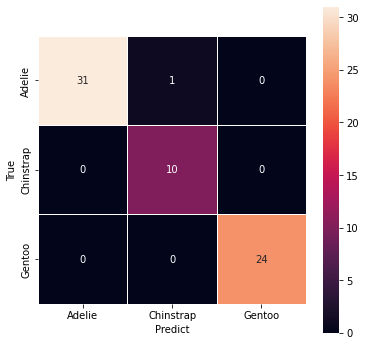

In [33]:
x_axis_labels = ['Adelie', 'Chinstrap', 'Gentoo'] # labels for x-axis
y_axis_labels = ['Adelie', 'Chinstrap', 'Gentoo'] # labels for y-axis

# make a heatmap for confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(RFc, annot = True, fmt='d', linewidths=.5,square=True, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.ylabel("True")
plt.xlabel("Predict")
plt.show()

We observe from the non-zero numbers on the diagonal that the model is almost correct in classifying penguin data except one incorrect prediction. We are looking for positive entries on the diagonal and 0's on off-diagonal, and our model classified an Adelie penguin as Chinstrap. Due to this error, our model accuracy was 98.48% on the testing data, which means it makes correct prediction 98.48% of the time. As mentioned above, the model can have some struggle when classifying Chinstrap and Gentoo. But overall, the model still really good.

Because random forest model uses many decision trees and vote to predict the best outcome, this good performance is reasonable since we have 18 decision trees in our best parameter.

## Decision Regions 

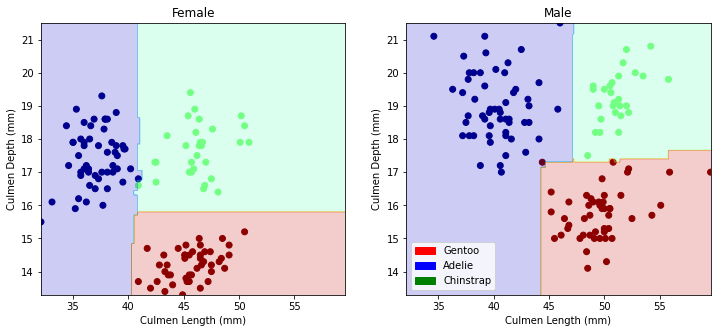

In [34]:
plot_regions(RF, X_train, y_train)

We can see that the decision region is pretty accurate in drawing borders of species and the border lines are almost linear without too many weird zigzags or curves.

Mistakes Made By Model: All penguins were correctly classified except for one female Adelie penguin being labeled as Chinstrap. We can also see that one of the male Gentoo penguin almost fall into the Chinstrap region. This is reasonable since Adelie and Chinstrap have similar culmen depth, and Chinstrap and Gentoo have similar culmen length, so we can have some error or borderline cases. This i. Otherwise, the decision regions classify most of the data points correctly.

# Third Model: Support Vector Machine Classifier

## Cross Validation

In [36]:
from sklearn import svm


score = np.zeros(100) # do 100 iterations to find the best parameter for SVM
bestS = 0 # initialize score low
bestD = 0
# we will use a linear kernel for a linear boundary in the decision regions
for i in range(1,101):
    SVM = svm.SVC(gamma = i,kernel = 'linear') # model of each level of complexity 
    score[i-1] = cross_val_score(SVM,X_train,y_train).mean() # take the mean of the validation scores for each model
    if score[i-1]>bestS: # update best score if current score is better than the current best
        bestD = 1/i # update best complexity parameter, gamma
        bestS = score[i-1]
        
print(bestD)
print(bestS) 

1.0
0.9805429864253394


We see that a complexity parameter of gamma = 1 produces the best score of 0.9805 on the training data. Since we did 100 iterations to find this parameter, there's strong evidence that this is the best parameter.

## Evaluation on Unseen Data

### SVM score

In [37]:
SVM = svm.SVC(gamma = 1,kernel = 'linear') # initialize a model using the best parameter
SVM.fit(X_train, y_train) # fit on the training data
SVM.score(X_test, y_test) # score on the testing data

1.0

When scoring on the testing set, the model reaches a 100% accuracy. Since the training score is already high enough, this performance is understandable. Since this gap is within a reasonable range (only about 2% higher than the training score), we can trust the model performs well.

### Confusion Matrix

In [140]:
y_test_pred=SVM.predict(X_test) # make prediction on the testing data
SVM_conf_matrix = confusion_matrix(y_test,y_test_pred) # generate confusion matrix
SVM_conf_matrix

array([[32,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 24]])

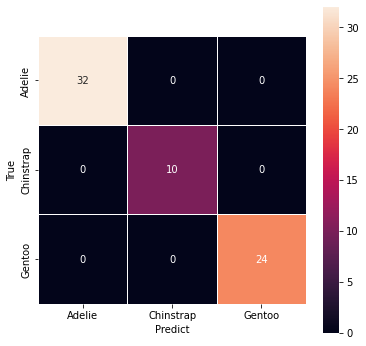

In [141]:
x_axis_labels = ['Adelie', 'Chinstrap', 'Gentoo'] # labels for x-axis
y_axis_labels = ['Adelie', 'Chinstrap', 'Gentoo'] # labels for y-axis

plt.figure(figsize=(6,6))
sns.heatmap(SVM_conf_matrix, annot = True, fmt='d', linewidths=.5,square=True, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.ylabel("True")
plt.xlabel("Predict")
plt.show()

We observe from the non-zero numbers on the diagonal entries that the model predicts all of the data correctly. As mentioned earlier, Adelie and Chinstrap have similar culmen length, and Chinstrap and Gentoo have similar culmen depth. From previous decision regions, we have also seen some of the data points were on the borderline of the decision regions. However, the model didn't make any mistakes, so we can believe SVM is a good model. Let's validate that with decision regions.

## Decision Regions 

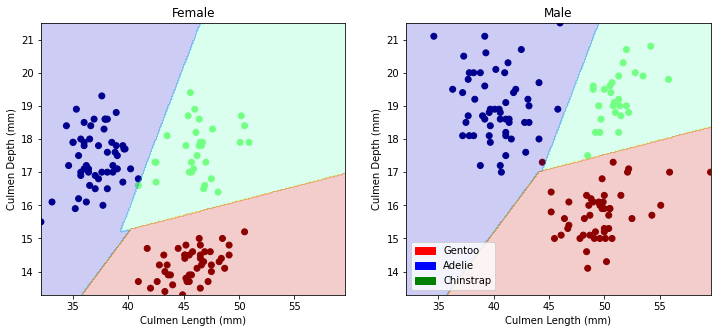

In [142]:
plot_regions(SVM, X_train, y_train)

Mistakes Made By Model:  All penguins were correctly classified, so we will discuss some potential weaknesses. 2 data points are lying on the boundary. We can see a female Chinstrap on the border of being classified as an Adelie, and a male Adelie on the border of Chinstrap. A couple other penguins are also close to the boundaries of the decision regions, so this reflects the model can have some vague predicitions on borderline cases despite the confusion matrix is correct. The borderlines also roughly forms a tree branch, so we can trust the model works well.

The reason why SVM performs well is that it tries to draw straight lines that can separate the clusters as much as possible, and it works well with linear data. Since we observed a linear relationship between culmen length and depth of penguin species, and each species forms a clear cluster, it's no surprise that SVM works well.

# Discussion

Analysis of Models: We used three types of models (Logistic Regression, Random Forest Classifier, and Support Vector Machines) to test how well the features of Culmen Length, Culmen Depth and Sex can predict a penguin species. We used systematic feature selection of all combinations of one qualitiative feature and two quantitative features to select these three attributes that scored the highest. When producing decision regions, we chose to use the training data because it makes overfitting easier to evaluate and visualize in addition to the test scores. The Logistic Regression and Support Vector Machines Model (SVM) performed the best with accuracies of 100%, while the Random Forest Classifier model performed at 98.48% accuracy. Perhaps the Random Forest Classifier model may have been overfitted, since it has more borderline data points in the decision region. 

Recommendation: We recommend using the Logistic Regression or SVM models using the Culmen Length, Culmen Depth and Sex features. The logistic regression draws the clearest decision region boundary, so it gives a higher clarity in classification. Random Forest Classifier is still a strong candidate because it uses many decision trees to vote on the best parameters, but its performance is slightly worse. 

Improvements: Sex, Culmen Length, and Culmen depth are the best predictors in the dataset we are given, suggesting that the biological aspects of the penguin are the best predictors of species. Perhaps there are biological characteristics and measurements that are even BETTER predictors of species that are not present in this data set. It would be useful to have access to even more biological data about the penguins, describing their behavioral patterns or physical attributes. Because length and depth can be similar for two species, having access to these data help us make better feature selections and produce more accurate predictions.

Having a larger sample size in the dataset would also lead to more accurate results. With more data, the models can derive more accurate results because there is more data to train and test with.  

From the confusion matrices of our models, we can see that they all made perfect predictions. Therefore, in the "mistakes of our model" section, we discussed the potential issues they can have, including some borderline data that they almost failed to classify correctly.

We are using training data when plotting decision regions to better assess overfitting and mistakes of the model.